In [1]:
import pandas as pd
import requests
import re
import numpy as np
from bs4 import BeautifulSoup as bs

# Wet Race Weekends

In [2]:
wet_races_id = []
wet_races_names = []
wet_races_year = []

#Import races.csv
races = pd.read_csv('f1db_csv/races.csv')

races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,2022-10-07,03:00:00,2022-10-07,06:00:00,2022-10-08,03:00:00,2022-10-08,06:00:00,\N,\N
1075,1093,2022,19,69,United States Grand Prix,2022-10-23,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...,2022-10-21,19:00:00,2022-10-21,22:00:00,2022-10-22,19:00:00,2022-10-22,22:00:00,\N,\N
1076,1094,2022,20,32,Mexico City Grand Prix,2022-10-30,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,2022-10-28,18:00:00,2022-10-28,21:00:00,2022-10-29,17:00:00,2022-10-29,20:00:00,\N,\N
1077,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,2022-11-11,15:30:00,2022-11-12,15:30:00,\N,\N,2022-11-11,19:00:00,2022-11-12,19:30:00


In [3]:
#Iterate through each row in the dataframe
for index, row in races.iterrows():
    wiki = requests.get(races.iloc[index]['url']).text
    count = len(re.findall(' wet | rain ', wiki))

    if count >= 1:
        wet_races_id.append(races.iloc[index]['raceId'])
        wet_races_names.append(races.iloc[index]['name'])
        wet_races_year.append(races.iloc[index]['year'])

In [4]:
#Create dataframe from list of names and years
wet_df = pd.DataFrame({'year': wet_races_year, 'name': wet_races_names, 'race_id': wet_races_id})

wet_df

,year,name,race_id
0,2009,Malaysian Grand Prix,2
1,2009,Chinese Grand Prix,3
2,2009,German Grand Prix,9
3,2009,Belgian Grand Prix,12
4,2009,Japanese Grand Prix,15
...,...,...,...
250,2022,British Grand Prix,1083
251,2022,Hungarian Grand Prix,1086
252,2022,Singapore Grand Prix,1091
253,2022,Japanese Grand Prix,1092


In [5]:
#Export dataframe to csv
wet_df.to_csv('Exported Dataframes/wet_races.csv')

### Wet races as a percentage of whole

In [6]:
wet_races_percentage = pd.DataFrame({'year': range(1950, 2023), 'percentage': (wet_df.groupby(['year']).count()['name'] / races.groupby(['year']).count()['name'] * 100)})
wet_races_percentage.reset_index(drop=True)

,year,percentage
0,1950,14.285714
1,1951,NaN
2,1952,12.500000
3,1953,NaN
4,1954,11.111111
...,...,...
68,2018,14.285714
69,2019,14.285714
70,2020,29.411765
71,2021,36.363636


In [7]:
#Export dataframe to csv
wet_races_percentage.to_csv('Exported Dataframes/yearly_percentage_wet.csv')

# Races Cut Short

In [8]:
short_races_id = []
short_races_names = []
short_races_year = []
short_races_reason = []

In [9]:
#Iterate through each row in the dataframe
for index, row in races.iterrows():
    wiki = requests.get(races.iloc[index]['url']).text
    count = len(re.findall('Scheduled distance', wiki))
    rain_count = len(re.findall(' wet | rain ', wiki))

    if count >= 1:
        short_races_id.append(races.iloc[index]['raceId'])
        short_races_names.append(races.iloc[index]['name'])
        short_races_year.append(races.iloc[index]['year'])

        if rain_count >= 1:
            short_races_reason.append('Rain')
        elif rain_count == 0:
            short_races_reason.append('Not Rain')

In [10]:
#Create dataframe from list of names and years
short_df = pd.DataFrame({'year': short_races_year, 'name': short_races_names, 'race_id': short_races_id, 'reason for cancel': short_races_reason})

short_df

,year,name,race_id,reason for cancel
0,2009,Malaysian Grand Prix,2,Rain
1,2008,Monaco Grand Prix,23,Rain
2,2007,Spanish Grand Prix,39,Rain
3,2007,British Grand Prix,44,Not Rain
4,2006,Australian Grand Prix,55,Not Rain
...,...,...,...,...
67,2021,Belgian Grand Prix,1063,Rain
68,2022,Monaco Grand Prix,1080,Rain
69,2022,Singapore Grand Prix,1091,Rain
70,2022,Japanese Grand Prix,1092,Rain


In [11]:
#Export dataframe to csv
short_df.to_csv('Exported Dataframes/short_races.csv')

# Weather Descriptions per Race

In [12]:
weather_races_id = []
weather_races_names = []
weather_races_year = []
weather_description = []

#### Using regex

In [13]:
for index, row in races.iterrows():
    wiki = requests.get(races.iloc[index]['url']).text
    description = re.findall('Weather</th><td colspan="3" class="infobox-data">\n?(.*?)</td>', wiki)

    if len(description) >= 1:
        weather_races_id.append(races.iloc[index]['raceId'])
        weather_races_names.append(races.iloc[index]['name'])
        weather_races_year.append(races.iloc[index]['year'])
        weather_description.append(description)

In [14]:
weather_df = pd.DataFrame({'year': weather_races_year, 'name': weather_races_names, 'race_id': weather_races_id, 'weather description': weather_description}).sort_values(by=['year'])

weather_df

,year,name,race_id,weather description
744,1950,Italian Grand Prix,839,"[Warm, hot and sunny]"
743,1950,French Grand Prix,838,[Hot and sunny]
742,1950,Belgian Grand Prix,837,"[Warm, dry and sunny]"
741,1950,Swiss Grand Prix,836,"[Warm, dry and sunny]"
740,1950,Indianapolis 500,835,[Rainy]
...,...,...,...,...
913,2022,Saudi Arabian Grand Prix,1075,[Clear]
931,2022,Mexico City Grand Prix,1094,[Partly cloudy]
891,2022,Bahrain Grand Prix,1074,[Clear]
921,2022,British Grand Prix,1083,[Partly cloudy]


<AxesSubplot:xlabel='year'>

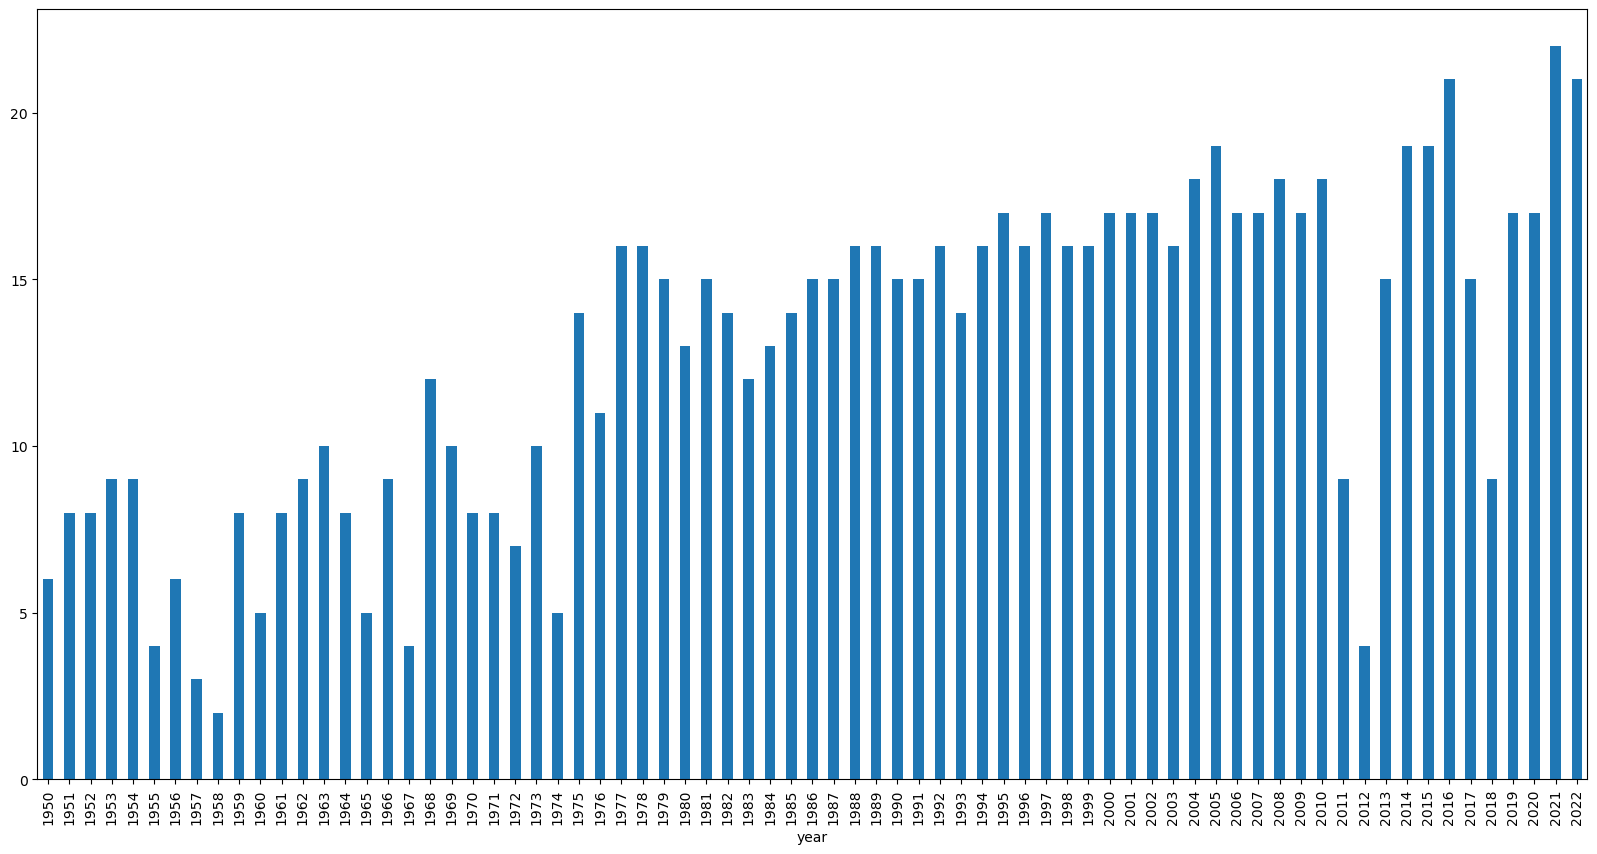

In [15]:
#View the number of weather descriptions grabbed per year
weather_df['year'].groupby(weather_df['year']).count().plot(kind='bar', figsize=(20, 10))

#### Using Beautifulsoup

In [16]:
for index, row in races.iterrows():
    #Get the html from the url
    wiki = requests.get(races.iloc[index]['url']).text
    
    #Use beautiful soup to parse the html
    wiki_soup = bs(wiki, 'html.parser')
    
    #Get the weather description using html tags
    try:
        #Searches the wiki infobox for the weather description
        description = wiki_soup.find('th', class_='infobox-label', text='Weather').find_next_sibling('td', class_='infobox-data').text
    except:
        description = 'No weather description'

    #Append lists with race and weather data
    weather_races_id.append(races.iloc[index]['raceId'])
    weather_races_names.append(races.iloc[index]['name'])
    weather_races_year.append(races.iloc[index]['year'])
    weather_description.append(description)

In [17]:
#For some reason some of the the weather description is a list within a list, so this removes the list
for i in range(len(weather_description)):
    #Removes \n at the beginning of some descriptions
    if type(weather_description[i]) == str:
        weather_description[i] = weather_description[i].replace('\n', '')
    
    #Replaces the list within a list with the first element of the list
    if type(weather_description[i]) == list:
        weather_description[i] = weather_description[i][0]

In [18]:
#Create dataframe from lists, ordered by year
weather_df = pd.DataFrame({'year': weather_races_year, 'name': weather_races_names, 'race_id': weather_races_id, 'weather_description': weather_description}).sort_values(by=['year'])

#Drop duplicates based on race_id
weather_df = weather_df.drop_duplicates(subset=['race_id'])

<AxesSubplot:xlabel='year'>

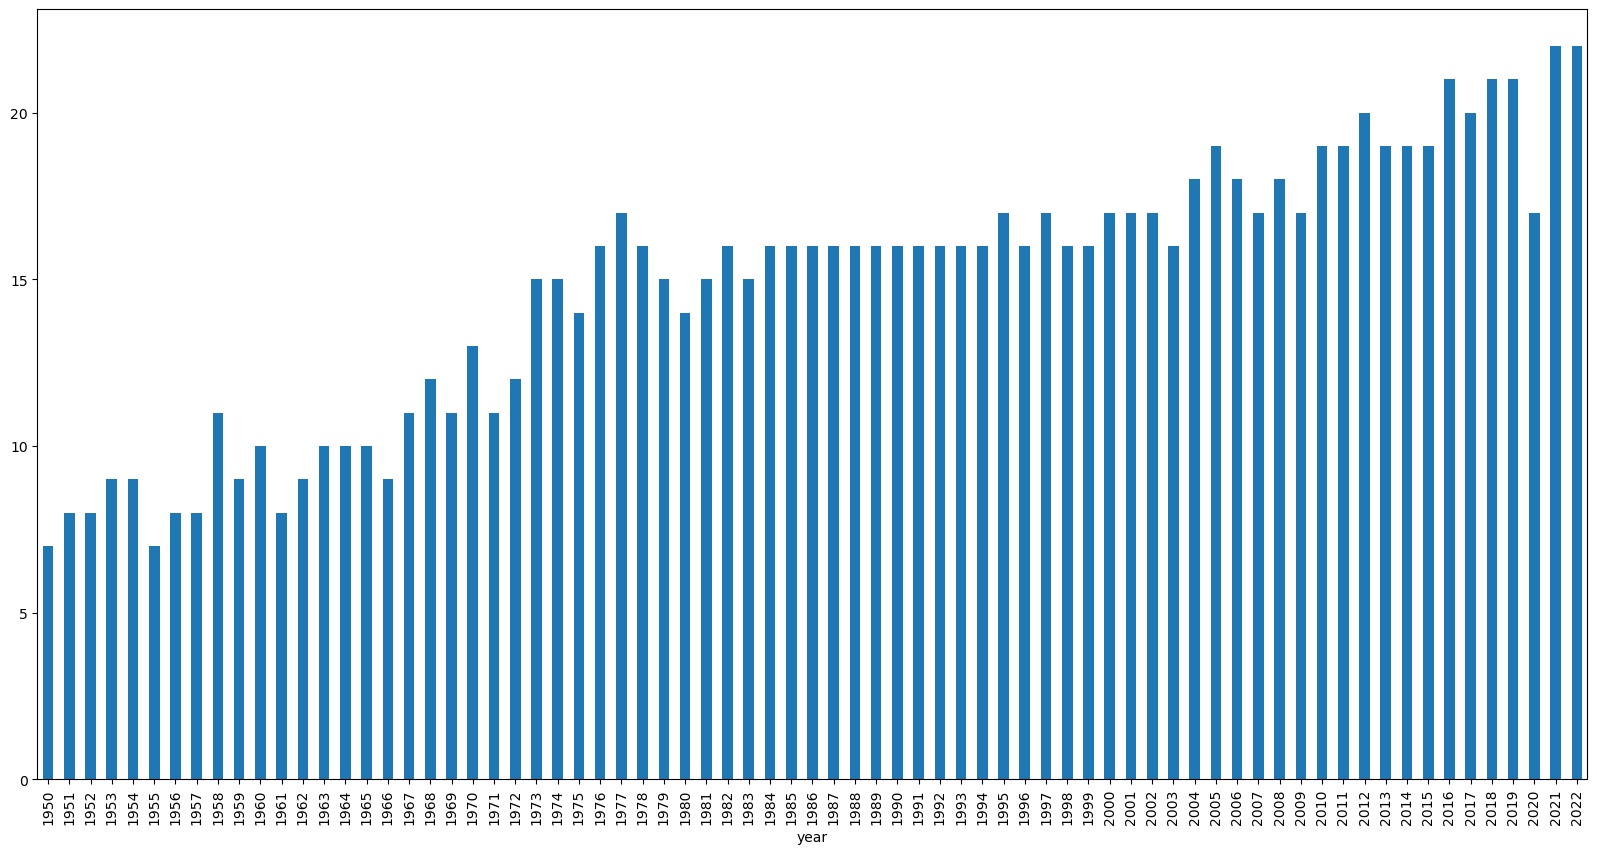

In [19]:
#View the number of weather descriptions grabbed per year
weather_df['year'].groupby(weather_df['year']).count().plot(kind='bar', figsize=(20, 10))

In [20]:
#Export dataframe to csv
weather_df.to_csv('Exported Dataframes/weather_description.csv')

# Wet races from weather descriptions

In [21]:
#Copy and add column to weather_df to determine if the race was wet
wet_races = weather_df

In [22]:
wet_races = wet_races.reset_index(drop=True)

In [23]:
wet_races

,year,name,race_id,weather_description
0,1950,French Grand Prix,838,Hot and sunny
1,1950,Indianapolis 500,835,Rainy
2,1950,British Grand Prix,833,"Sunny, mild, dry."
3,1950,Belgian Grand Prix,837,"Warm, dry and sunny"
4,1950,Italian Grand Prix,839,"Warm, hot and sunny"
...,...,...,...,...
1074,2022,Azerbaijan Grand Prix,1081,Sunny
1075,2022,Mexico City Grand Prix,1094,Partly cloudy
1076,2022,Bahrain Grand Prix,1074,Clear
1077,2022,Brazilian Grand Prix,1095,Cloudy


In [24]:
#Create a list for the wet column
is_it_wet = []

for index, row in wet_races.iterrows():
    #Create a regex pattern to search for rain and wet
    r = re.compile('rain|wet|rainy|typhoon|monsoon|shower|showers|thunderstorm|thunderstorms|drizzle|drizzles', re.IGNORECASE)
    
    #Search the weather description for the pattern
    count = len(r.findall(wet_races.iloc[index]['weather_description']))
    
    #If there is any result in the search, add 'wet' to the list
    if count >= 1:
        is_it_wet.append('Wet')
    elif count == 0:
        is_it_wet.append('Not Wet')

In [25]:
wet_races['is_it_wet'] = is_it_wet

In [26]:
wet_races

,year,name,race_id,weather_description,is_it_wet
0,1950,French Grand Prix,838,Hot and sunny,Not Wet
1,1950,Indianapolis 500,835,Rainy,Wet
2,1950,British Grand Prix,833,"Sunny, mild, dry.",Not Wet
3,1950,Belgian Grand Prix,837,"Warm, dry and sunny",Not Wet
4,1950,Italian Grand Prix,839,"Warm, hot and sunny",Not Wet
...,...,...,...,...,...
1074,2022,Azerbaijan Grand Prix,1081,Sunny,Not Wet
1075,2022,Mexico City Grand Prix,1094,Partly cloudy,Not Wet
1076,2022,Bahrain Grand Prix,1074,Clear,Not Wet
1077,2022,Brazilian Grand Prix,1095,Cloudy,Not Wet


In [27]:
#Export dataframe to csv
wet_races.to_csv('Exported Dataframes/weather_description.csv')

## Wet races as a percentage of whole

In [28]:
wet_races_percentage = pd.DataFrame({'year': range(1950, 2023), 'percentage': (wet_races.groupby(['year']).count()['name'] / races.groupby(['year']).count()['name'] * 100)})
wet_races_percentage.reset_index(drop=True)

,year,percentage
0,1950,100.0
1,1951,100.0
2,1952,100.0
3,1953,100.0
4,1954,100.0
...,...,...
68,2018,100.0
69,2019,100.0
70,2020,100.0
71,2021,100.0
